In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('payment_fraud.csv')

In [3]:
df.head()

,accountAgeDays,numItems,localTime,paymentMethod,paymentMethodAgeDays,label
0,29,1,4.745402,paypal,28.204861,0
1,725,1,4.742303,storecredit,0.000000,0
2,845,1,4.921318,creditcard,0.000000,0
3,503,1,4.886641,creditcard,0.000000,0
4,2000,1,5.040929,creditcard,0.000000,0


In [4]:
df.shape

(39221, 6)

In [5]:
df.isnull().sum()

accountAgeDays          0
numItems                0
localTime               0
paymentMethod           0
paymentMethodAgeDays    0
label                   0
dtype: int64

In [6]:
df['label'].value_counts()

0    38661
1      560
Name: label, dtype: int64

In [8]:
df['label']=df['label'].replace(0,'Legit')

In [9]:
df['label']=df['label'].replace(1,'Fraud')

In [10]:
df.head()

,accountAgeDays,numItems,localTime,paymentMethod,paymentMethodAgeDays,label
0,29,1,4.745402,paypal,28.204861,Legit
1,725,1,4.742303,storecredit,0.000000,Legit
2,845,1,4.921318,creditcard,0.000000,Legit
3,503,1,4.886641,creditcard,0.000000,Legit
4,2000,1,5.040929,creditcard,0.000000,Legit


In [11]:
df['label'].value_counts()

Legit    38661
Fraud      560
Name: label, dtype: int64

In [12]:
df['paymentMethod'].value_counts()

creditcard     28004
paypal          9303
storecredit     1914
Name: paymentMethod, dtype: int64

In [14]:
df[df['label']=='Fraud']

,accountAgeDays,numItems,localTime,paymentMethod,paymentMethodAgeDays,label
109,1,4,4.836982,creditcard,0.000000,Fraud
243,1,1,4.836982,paypal,0.002778,Fraud
280,1,1,4.921318,creditcard,0.000000,Fraud
362,1,1,4.524580,paypal,0.000000,Fraud
420,1,1,4.748314,paypal,0.000000,Fraud
...,...,...,...,...,...,...
38830,1,2,4.876771,creditcard,0.000000,Fraud
38880,1,1,4.876771,creditcard,0.000000,Fraud
39005,1,1,4.505662,creditcard,0.000000,Fraud
39111,1,3,4.748314,creditcard,0.025000,Fraud


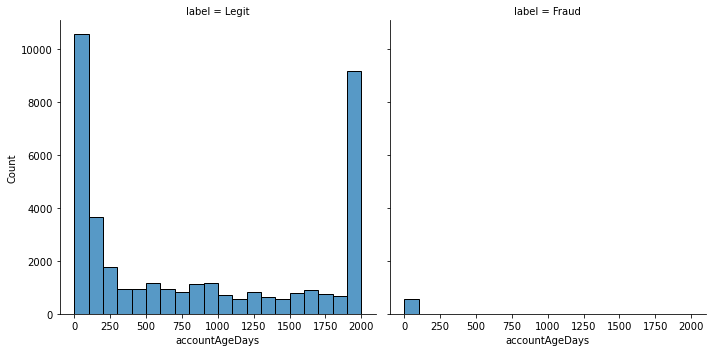

In [22]:
sns.displot(x='accountAgeDays',data=df, col='label')

In [24]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
accountAgeDays,39221.0,857.563984,804.788212,1.000000,72.000000,603.000000,1804.000000,2000.000000
numItems,39221.0,1.084751,0.566899,1.000000,1.000000,1.000000,1.000000,29.000000
localTime,39221.0,4.748232,0.389360,0.421214,4.742303,4.886641,4.962055,5.040929
paymentMethodAgeDays,39221.0,122.641326,283.569177,0.000000,0.000000,0.012500,87.510417,1999.580556


In [25]:
df['numItems'].value_counts()

1     37398
2      1348
5       168
3       164
10       71
4        42
6        15
8         5
7         5
12        1
15        1
29        1
9         1
11        1
Name: numItems, dtype: int64

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39221 entries, 0 to 39220
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   accountAgeDays        39221 non-null  int64  
 1   numItems              39221 non-null  int64  
 2   localTime             39221 non-null  float64
 3   paymentMethod         39221 non-null  object 
 4   paymentMethodAgeDays  39221 non-null  float64
 5   label                 39221 non-null  object 
dtypes: float64(2), int64(2), object(2)
memory usage: 1.8+ MB


In [27]:
X=df.drop('label',axis=1)

In [28]:
y=df['label']

In [29]:
X

,accountAgeDays,numItems,localTime,paymentMethod,paymentMethodAgeDays
0,29,1,4.745402,paypal,28.204861
1,725,1,4.742303,storecredit,0.000000
2,845,1,4.921318,creditcard,0.000000
3,503,1,4.886641,creditcard,0.000000
4,2000,1,5.040929,creditcard,0.000000
...,...,...,...,...,...
39216,986,1,4.836982,creditcard,0.000000
39217,1647,1,4.876771,creditcard,377.930556
39218,1591,1,4.742303,creditcard,0.000000
39219,237,1,4.921318,creditcard,236.082639


In [32]:
X=pd.get_dummies(X)

In [33]:
X.head()

,accountAgeDays,numItems,localTime,paymentMethodAgeDays,paymentMethod_creditcard,paymentMethod_paypal,paymentMethod_storecredit
0,29,1,4.745402,28.204861,0,1,0
1,725,1,4.742303,0.000000,0,0,1
2,845,1,4.921318,0.000000,1,0,0
3,503,1,4.886641,0.000000,1,0,0
4,2000,1,5.040929,0.000000,1,0,0


In [34]:
from sklearn.model_selection import train_test_split

In [35]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3, random_state=101)

In [36]:
len(X_train)

27454

In [37]:
len(X_test)

11767

In [38]:
X_val,X_holdout, y_val,y_holdout=train_test_split(X_test,y_test, test_size=0.5, random_state=101)

In [39]:
from sklearn.preprocessing import StandardScaler

In [40]:
scaler=StandardScaler()

In [41]:
X_train_scaler=scaler.fit_transform(X_train)

In [42]:
X_val_scaler=scaler.transform(X_val)

In [43]:
X_holdout_scaler=scaler.transform(X_holdout)

In [44]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

In [46]:
from sklearn.metrics import classification_report, plot_confusion_matrix

In [45]:
import warnings
warnings.filterwarnings('ignore')

In [47]:
def report_model(model):
    pred=model.predict(X_val)
    print(classification_report(y_val, pred))
    print('\n')
    plot_confusion_matrix(model,X_val,y_val)

In [48]:
log_model=LogisticRegression()

In [49]:
log_model.fit(X_train,y_train)

LogisticRegression()

Logistic regression model
              precision    recall  f1-score   support

       Fraud       1.00      1.00      1.00        91
       Legit       1.00      1.00      1.00      5792

    accuracy                           1.00      5883
   macro avg       1.00      1.00      1.00      5883
weighted avg       1.00      1.00      1.00      5883





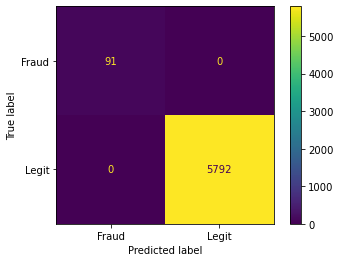

In [52]:
print('Logistic regression model')
#print('\n')
report_model(log_model)

In [53]:
log_model.fit(X_train_scaler,y_train)

LogisticRegression()

In [54]:
print(classification_report(y_val,log_model.predict(X_val_scaler)))

              precision    recall  f1-score   support

       Fraud       0.00      0.00      0.00        91
       Legit       0.98      1.00      0.99      5792

    accuracy                           0.98      5883
   macro avg       0.49      0.50      0.50      5883
weighted avg       0.97      0.98      0.98      5883



In [65]:
rf_model=RandomForestClassifier(random_state=101, max_features=2)

In [66]:
rf_model.fit(X_train,y_train)

RandomForestClassifier(max_features=2, random_state=101)

              precision    recall  f1-score   support

       Fraud       1.00      1.00      1.00        91
       Legit       1.00      1.00      1.00      5792

    accuracy                           1.00      5883
   macro avg       1.00      1.00      1.00      5883
weighted avg       1.00      1.00      1.00      5883





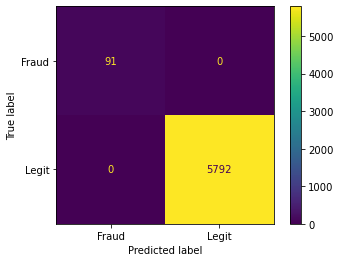

In [67]:
report_model(rf_model)

In [68]:
rf_model.predict(X_holdout)

array(['Legit', 'Legit', 'Legit', ..., 'Legit', 'Legit', 'Legit'],
      dtype=object)

In [69]:
print(classification_report(y_holdout,rf_model.predict(X_holdout)))

              precision    recall  f1-score   support

       Fraud       1.00      1.00      1.00        91
       Legit       1.00      1.00      1.00      5793

    accuracy                           1.00      5884
   macro avg       1.00      1.00      1.00      5884
weighted avg       1.00      1.00      1.00      5884



In [70]:
X

,accountAgeDays,numItems,localTime,paymentMethodAgeDays,paymentMethod_creditcard,paymentMethod_paypal,paymentMethod_storecredit
0,29,1,4.745402,28.204861,0,1,0
1,725,1,4.742303,0.000000,0,0,1
2,845,1,4.921318,0.000000,1,0,0
3,503,1,4.886641,0.000000,1,0,0
4,2000,1,5.040929,0.000000,1,0,0
...,...,...,...,...,...,...,...
39216,986,1,4.836982,0.000000,1,0,0
39217,1647,1,4.876771,377.930556,1,0,0
39218,1591,1,4.742303,0.000000,1,0,0
39219,237,1,4.921318,236.082639,1,0,0


In [74]:
rf_model.predict([[1,1,4.745402,28.204861,0,1,0]])

array(['Fraud'], dtype=object)

In [75]:
#df[df['label']=='Fraud']

In [76]:
random_forest_model=RandomForestClassifier(random_state=101, max_features=2)

In [77]:
random_forest_model.fit(X,y)

RandomForestClassifier(max_features=2, random_state=101)

In [78]:
import joblib

In [79]:
joblib.dump(random_forest_model, 'rf_model.pkl')

['rf_model.pkl']

In [80]:
loaded_model=joblib.load('rf_model.pkl')

In [81]:
loaded_model.predict([[1,1,4.745402,28.204861,0,1,0]])

array(['Fraud'], dtype=object)

In [82]:
X.head()

,accountAgeDays,numItems,localTime,paymentMethodAgeDays,paymentMethod_creditcard,paymentMethod_paypal,paymentMethod_storecredit
0,29,1,4.745402,28.204861,0,1,0
1,725,1,4.742303,0.000000,0,0,1
2,845,1,4.921318,0.000000,1,0,0
3,503,1,4.886641,0.000000,1,0,0
4,2000,1,5.040929,0.000000,1,0,0


In [84]:
X.columns

Index(['accountAgeDays', 'numItems', 'localTime', 'paymentMethodAgeDays',
       'paymentMethod_creditcard', 'paymentMethod_paypal',
       'paymentMethod_storecredit'],
      dtype='object')